# **AICP ML Internship 3.0 Task Week 4**

**App User Segmentation**

In the problem of app user segmentation, we need to group users based on how they engage with the app. We have data about the users based on how they engage with the app.

Find relationships between the users who are still using the application and the users who have uninstalled the application and create user segments to understand the retained users and the users that can be retained before they move to other alternatives.

Q.1: **Import data and check null values, column info, and descriptive statistics of the data.**

In [2]:
import pandas as pd

# Load the dataset
df_user_behaviour = pd.read_csv('/content/userbehaviour.csv')

# Check for null values
null_values = df_user_behaviour.isnull().sum()
print("Null Values:\n", null_values)

# Print the column info
print("\nColumn Info:")
df_user_behaviour.info()

# Print descriptive statistics
descriptive_statistics = df_user_behaviour.describe()
print("\nDescriptive Statistics:\n", descriptive_statistics)


Null Values:
 userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5),

Q.2: **Check the highest, lowest, and average screen time of all the users.**

In [9]:
import pandas as pd

# Load the dataset
df_user_behaviour = pd.read_csv('/content/userbehaviour.csv')

# Calculate the highest, lowest, and average screen time
highest_screen_time = df_user_behaviour['Average Screen Time'].max()
lowest_screen_time = df_user_behaviour['Average Screen Time'].min()
average_screen_time = df_user_behaviour['Average Screen Time'].mean()

print("Highest Screen Time:", highest_screen_time)
print("Lowest Screen Time:", lowest_screen_time)
print("Average Screen Time:", average_screen_time)


Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


Q.3: **Check the highest, lowest, and the average amount spent by all the users.**

In [10]:
import pandas as pd

# Load the dataset
df_user_behaviour = pd.read_csv('/content/userbehaviour.csv')

# Calculate the highest, lowest, and average amount spent
highest_amount_spent = df_user_behaviour['Average Spent on App (INR)'].max()
lowest_amount_spent = df_user_behaviour['Average Spent on App (INR)'].min()
average_amount_spent = df_user_behaviour['Average Spent on App (INR)'].mean()

print("Highest Amount Spent:", highest_amount_spent)
print("Lowest Amount Spent:", lowest_amount_spent)
print("Average Amount Spent:", average_amount_spent)


Highest Amount Spent: 998.0
Lowest Amount Spent: 0.0
Average Amount Spent: 424.4154154154154


Q.4: **Now check the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app. Also explain your observation.**

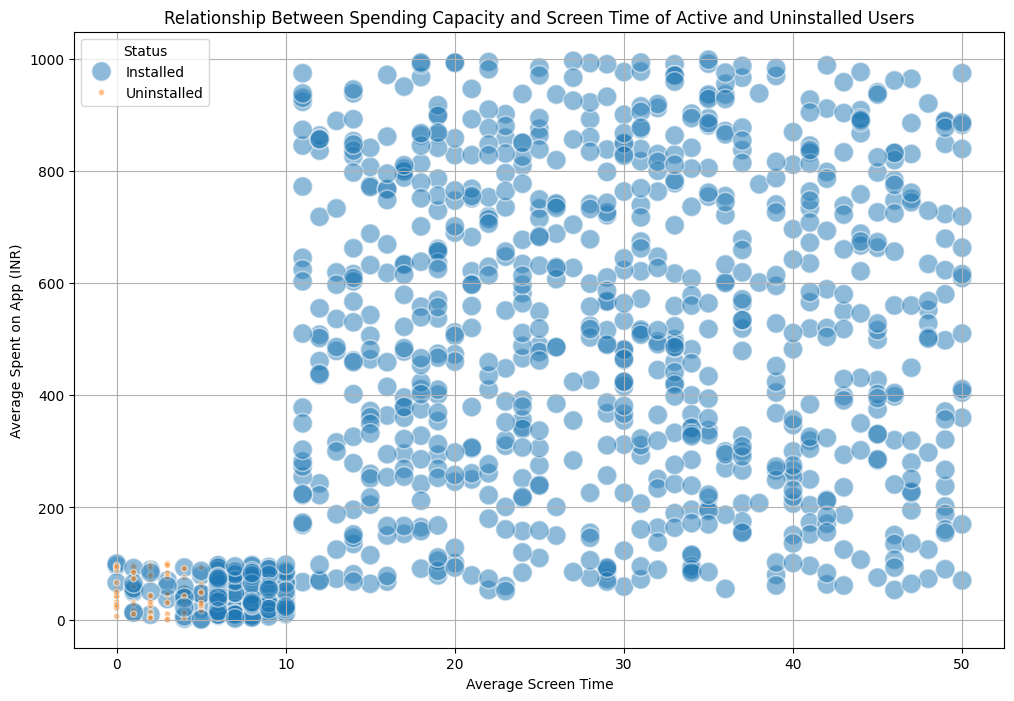

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/userbehaviour.csv')

# Plot for Q.4
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Average Screen Time',
    y='Average Spent on App (INR)',
    hue='Status',  # Color by Status
    size='Status',  # Size by Status, this makes the distinction clearer
    sizes=(20, 200),  # Control the size of the scatter points
    alpha=0.5  # Transparency of points
)
plt.title('Relationship Between Spending Capacity and Screen Time of Active and Uninstalled Users')
plt.legend(title='Status')
plt.grid(True)  # Add grid for better readability
plt.show()


Q.5: **Now check the relationship between the ratings given by users and the average screen time. Also explain your observation.**

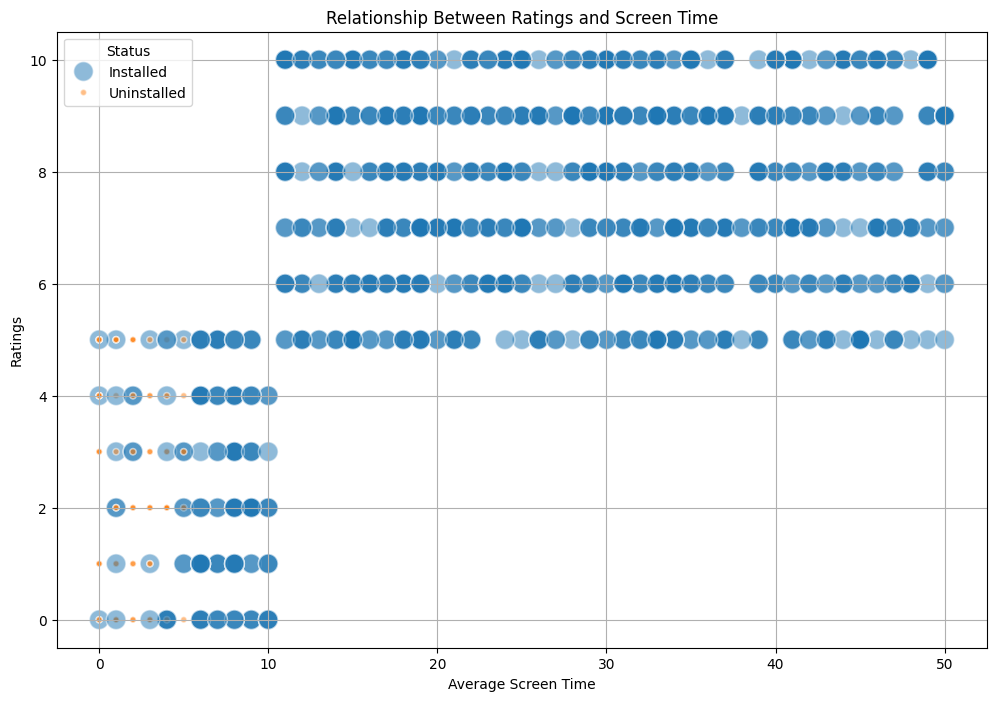

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/userbehaviour.csv')

# Plot for Q.5
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Average Screen Time',
    y='Ratings',
    hue='Status',  # Color by Status
    size='Status',  # Size by Status, this makes the distinction clearer
    sizes=(20, 200),  # Control the size of the scatter points
    alpha=0.5  # Transparency of points
)
plt.title('Relationship Between Ratings and Screen Time')
plt.legend(title='Status')
plt.grid(True)  # Add grid for better readability
plt.show()


Q.6: **Now move forward to App User segmentation to find the users that the app retained and lost forever. You can use the K-means clustering algorithm in Machine Learning for this task. Also, tell the number of segments you have got.**

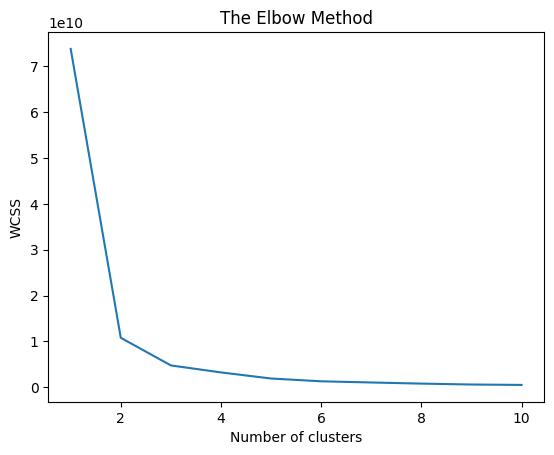

Number of segments: 3


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/userbehaviour.csv')

# Preparing the data for K-means clustering (using 'Last Visited Minutes' and 'Average Spent on App (INR)')
X = df[['Last Visited Minutes', 'Average Spent on App (INR)']]

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for within-cluster sum of squares
plt.show()

# Choosing the number of clusters (k) and applying to the dataset
# Assuming the optimal number of clusters is 3 based on the Elbow method
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster data to the original dataframe
df['Segment'] = y_kmeans

# Output the number of segments
print(f'Number of segments: {df["Segment"].nunique()}')


Q.7: **Now visualize the segments**.

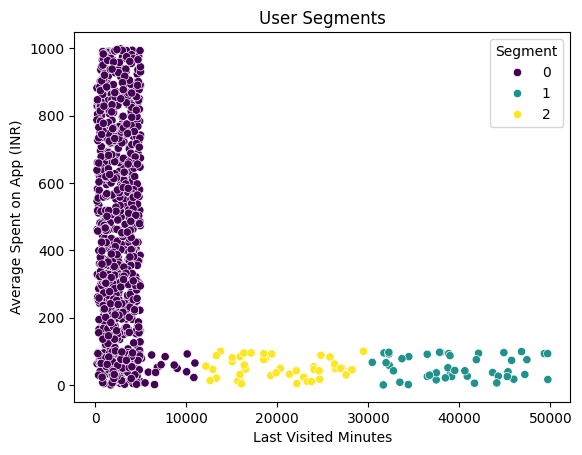

In [15]:
# Visualization of segments from Q.6
sns.scatterplot(data=df, x='Last Visited Minutes', y='Average Spent on App (INR)', hue='Segment', palette='viridis')
plt.title('User Segments')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.legend(title='Segment')
plt.show()


Q.8: **Explain the summary of your working.**

**Summary of working of all tasks**

**Data Import and Analysis (Q.1):**

Loaded the user behavior dataset and performed an initial assessment. This involved checking for any missing values, examining the data types of each column, and calculating descriptive statistics to understand the distribution of data.

**Screen Time Analysis (Q.2 and Q.3):**

Determined the highest, lowest, and average screen time, as well as the amount spent by users. This provided insights into user engagement and financial contribution.

**User Status Visualization (Q.4 and Q.5):**

Visualized the relationship between spending capacity and screen time, as well as user ratings and screen time, differentiating between active users and those who have uninstalled the app. This helped identify patterns related to user retention and app engagement.

**User Segmentation (Q.6):**

Applied K-means clustering to segment users based on their last visit time and spending on the app. The Elbow method was used to determine the optimal number of clusters. This segmentation is essential for personalized marketing strategies and user engagement optimization.

**Segment Visualization (Q.7):**

Created visualizations for the identified user segments, which highlighted the distinct behaviors and characteristics of each group. Visualizing these segments assists in recognizing user groups that may require different engagement strategies.
